<h1 align="center">Finite volume methods for Lighthill–Whitham–Richards traffic flow model</h1>

<h2 align="center">Introduction</h2>
Opowieść o tym co zrobimy w pracy - jaki model, jaka metoda numeryczna, jakie przykłady.

Opowieść o istotności tematu, podejściu mikroskopowym i makroskopowym.

<h2 align="center">LWR model</h2>

Source: [1] chap. Macroscopic Modeling

In macroscopic vehicular modeling we don't look at vehicules individually - we measure some average quantities like density of vehicules on a road at specific time $t$ and specific point $x$ or mean velocity. Usually the motion of cars on a road is one dimentional, so we will be considering this case in which we have only one line road and spatial coordinate $x$ is a scalar independent variable in an appropriate subset of $\mathbb{R}$. 

The main dependent variables introduced to describe the problem are:
- $\rho = \rho(t, x)$ density of cars at time $t$ in the point $x$,
- $u = u(t, x)$ average velocity at time $t$ in the point $x$,
- $q = q(\rho) = \rho u\left(x,t\right)$ the flux, the number of cars passing through an imaginary gate in a given time.  


From the principle of conservation of the vehicles we have 
$$\frac{\partial \rho}{\partial t} + \frac{\partial q\left(\rho\right)}{\partial x} = 0,$$
which means
$$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left(\rho u\right) = 0.$$

Looking at conservation law's equation we can see that the time difference in the amount of cars in the stretch of road between point $x_1$ and $x_2$ is balanced by the difference between incoming flux at $x_1$ and the outgoing flux at $x_2$:

$$\frac{d}{dt} \int_{x_1}^{x_2} \rho\left(t,x\right) dx = \rho\left(t, x_1\right) - \rho\left(t,x_2\right). $$

Lighthill and Whitham and independently Richards proposed the prototype of all fluxes - the parabolic profile by

$$f\left(\rho\right) = u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).$$
Using $f\left(\rho\right) = u\left(\rho\right) = \rho u$ we have
$$u(\rho) = u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).$$ 

The parameter $u_{\text{max}}$ identifies the maximum velocity of cars in a situation of completely free
road $\left(\rho=0\right)$. This model assumes zero flux of vehicales when both $\rho=0$ and $\rho=\rho_{\text{max}}$. Velocity is assumed to be linear function with respect to density. We can see it on the chart below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 130

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# center plots
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [3]:
def f(rho, u_max, rho_max):
    """
    Function calculates values of fundamental diagram for LWR model.
    
    Arguments:
    rho - density of cars,
    u_max - the maximum velocity of cars,
    rho_max - the maximum density of cars.
    """
    f_ = u_max*rho*(1-rho/rho_max)
    return f_

In [4]:
def u(rho, u_max, rho_max):
    """
    Function calculates values of velocity diagram for LWR model.
    
    Arguments:
    rho - density of cars,
    u_max - the maximum velocity of cars,
    rho_max - the maximum density of cars.
    """
    u_ = f(rho, u_max, rho_max)/rho
    return u_

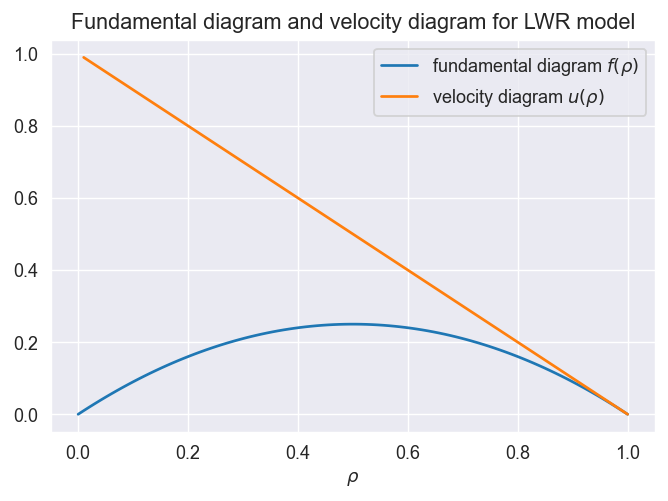

In [5]:
rho_max = 1
u_max = 1
rho = np.linspace(0, rho_max, 100)

plt.plot(rho, f(rho, u_max, rho_max), label=r"fundamental diagram $f\left(\rho\right)$")
plt.plot(rho, u(rho, u_max, rho_max), label=r"velocity diagram $u\left(\rho\right)$")
plt.title("Fundamental diagram and velocity diagram for LWR model")
plt.xlabel(r"$\rho$")
plt.legend()

<h2 align="center">Real-world examples and analytical solution</h2>

<h3 align="center">Red light turns green</h3>

We will consider a case in which the red light at $x=0$ turns green at $t=0$. It means that we have

$$\begin{cases} \rho_t + q_x = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{\text{max}},~x < 0 \\ 0,~x>0. \end{cases} \end{cases}$$

Using $q=\rho u$ for flux and $u(\rho) = u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right)$ from LWR model we obtain

$$\begin{cases} \rho_t + u_{\text{max}} \rho_x \left(1-2 \frac{\rho}{\rho_{\text{max}}}\right) = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{\text{max}},~x<0 \\ 0,~x>0.\end{cases} \end{cases}$$

To solve this problem we will use the method of characteristics. We begin with

$$\begin{cases} x=X\left(t\right) \\
P \left(X\left(t\right), t\right) = P \left(t\right) \end{cases}$$

and using initial condition $X\left(0\right) = \xi$ we get

$$P\left(t\right) = \begin{cases} \rho_{\text{max}},~\xi<0 \\ 
0,~\xi>0 \end{cases}$$

and 

$$X\left(t\right) = \begin{cases} -u_{\text{max}} t + \xi,~\xi<0 \\ 
u_{\text{max}} t + \xi,~\xi>0. \end{cases}$$

In [ ]:
# wykres charakterystyk hehe - mamy void

We have a void between out characteristics - a region with no solution. We will fill it with the fan. Having

$$c\left(\rho\right) = u_{\text{max}} \left(1-2\frac{\rho}{\rho_{\text{max}}}\right)$$

and starting point $x_0=0$, $t_0=0$, we obtain

$$c^{-1}\left(\frac{x}{t}\right) = \tilde{\rho} \left(x,t\right) = \frac{\rho_{\text{max}}\left(1-\frac{x}{t u_{\text{max}}}\right)}{2}.$$

In [ ]:
# wykres rozwiązania dla rónych t albo animacja jak w linku

<h3 align="center">Traffic jam</h3>

We can also consider a case when cars approach a traffic jam due to for example construction, an accident or a red light. At the point of the obstacle $x=0$ the density of cars will be maximum - $\rho_{\text{max}}$ and upstream of it the density will be lower, so $\rho_l < \rho_{\text{max}}$. Using LWR model we have

$$\begin{cases} \rho_t + u_{\text{max}} \rho_x \left(1-2 \frac{\rho}{\rho_{\text{max}}}\right) = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{l},~x<0 \\ \rho_{\text{max}},~x>0.\end{cases} \end{cases}$$

Finally, also using the method of characteristics we obtain
$$P\left(t\right) = \begin{cases} \rho_l,~\xi<0 \\ 
\rho_{\text{max}},~\xi>0\end{cases}$$
and 
$$X\left(t\right) = \begin{cases} u_{\text{max}} t \left(1-2 \frac{\rho_l}{\rho_{\text{max}}}\right)+\xi,~\xi<0 \\ 
- u_{\text{max}} t +\xi,~\xi>0. \end{cases}$$

In [ ]:
# Wykres charakterystyki - mamy shock wave. Tutaj w zależności od znaku 1-2 rho_l/rho_max bedziemy mieli rozne 
# wykresy charakterystyk (shock wave'y inaczej wygladaja) ale wzor sprowadza sie do tego samego

Our characteristics intersect, so we have to fit a shock wave. 

We have 
$$q'\left(\rho\right) = c\left(\rho\right) = u_{\text{max}} \left(1-2\frac{\rho}{\rho_{\text{max}}}\right),$$
so 
$$q\left(\rho\right) = u_{\text{max}} \rho - u_{\text{max}} \frac{\rho^{2}}{\rho_{\text{max}}}.$$

Using $\rho_{+} = \rho_{\text{max}}$ and $\rho_{-} = \rho_l$ we obtain
$$s'\left(t\right) = \frac{u_{\text{max}} \rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l\right)} $$
and finally having $s\left(0\right) = 0$
$$s\left(t\right) = \frac{u_{\text{max}} \rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l\right)} t.$$

In [ ]:
# wykres charakterystyk - dla dwóch przypadków znaków ???

In [ ]:
# wykres rozwiązania dla rónych t albo animacja jak w linku

<h2 align="center">Finite volume method and its application for LWR model</h2>

We will consider general conservation law equation (possibly nonlinear) in the form $$\rho_t(x, t) + f(\rho(x, t))_x = 0$$

We introduce a space-time cell:
$$[x_{j - 1/2}, x_{j +  1/2}] \times [t_n, t_{n+1}],$$

where $x_j = jk,~x_{j \pm 1/2} = x_j \pm k/2,~t_n = nh$.
If we now consider the cell average:
$$\rho_j^n := \frac{1}{k} \int\limits_{x_{j-1/2}}^{x_{j+1/2}} \rho(x, t_n) dx,$$
and the so-called numerical flux:
$$F_{j+1/2}^n := \frac{1}{h} \int\limits_{t_n}^{t_{n+1}} f(\rho(x_{j+1/2}, t))dt,$$
we obtain 
$$\rho_j^{n+1} = \rho_j^n - \frac{h}{k}\left(F_{j+1/2}^n - F_{j-1/2}^n\right).$$

This is known as finite volume method. Now we are interested in finding good approximation of numerical flux $F$. 
Our first approach in this case will be

$$F_{j+1/2}^n = f(\rho_j^n) = u_{\text{max}}\rho_j^n\left(1 - \frac{\rho_j^n}{\rho_{\text{max}}}\right).$$
Therefore
$$\rho_j^{n+1} = \rho_j^n - \frac{h}{k}u_{\text{max}}\left(\rho_j^n\left(1 - \frac{\rho_j^n}{\rho_{\text{max}}}\right) - \rho_{j-1}^n\left(1 - \frac{\rho_{j-1}^n}{\rho_{\text{max}}}\right)\right).$$

The second approach is to use the Lax-Friedrich scheme:
$$\rho_j^{n+1} = \frac{1}{2}\left(\rho_{j+1}^n + \rho_{j-1}^n\right) + \frac{h}{2k}\left(f(\rho_{j-1}^n) - f(\rho_{j+1}^n)\right)$$
with the numerical flux
$$F_{j+1/2}^{n} = \frac{h}{2k}\left(\rho_{j}^n - \rho_{j+1}^n\right) + \frac{1}{2}\left(f(\rho_{j}^n) + f(\rho_{j+1}^n)\right).$$

Here we obtain

WZÓR DOKŁADNY

<h3 align="center">Consistency</h3>

<h3 align="center">Convergence</h3>

<h3 align="center">Stability</h3>

<h2 align="center">Conclusions</h2>

<h2 align="center">Resources</h2>

[1] Piccoli Benedetto, Tosin Andrea *Vehicular Traffic: A Review of Continuum Mathematical Models* (ARTYKUŁ Z MAILA)

[2] Płociniczak Łukasz *Numerical methods for differential equations* Lecture notes (WYKŁAD DO METOD NUMERYCZNYCH)